# Predicting Bank Telemarketing Success


#### The dataset is located here http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

#### Goal: To effectively predict whether a client will subscribe to a term deposit or not

In [1]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import set_option

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import scipy
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer as Imputer
from sklearn.impute import KNNImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve

In [2]:
# LOAD DATASET

low_memory=False
bank_df = pd.read_csv('bank-additional-full.csv', sep=";", header=None, dtype=object)
# Load dataset

new_header = bank_df.iloc[0]
bank_df = bank_df[1:]
bank_df.columns=new_header
# Move first line of data to the header 


In [3]:
#Check the shape of loaded dataset
bank_df.shape

(41188, 21)

In [4]:
# Check the set data
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41184,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41185,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41187,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Attribute Information:

#### Input variables:

#### Bank Client Data:
1. Age: (numeric)
2. Job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. Marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. Education: (categorical: primary, secondary, tertiary and unknown)
5. Default: has credit in default? (categorical: 'no','yes','unknown')
6. Housing: has housing loan? (categorical: 'no','yes','unknown')
7. Loan: has personal loan? (categorical: 'no','yes','unknown')
8. Balance: Balance of the individual.

#### Related with the last contact of the current campaign:
9. Contact: contact communication type (categorical: 'cellular','telephone')
10. Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11. Day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
12. Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Other Attributes:
13. Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. Previous: number of contacts performed before this campaign and for this client (numeric)
16. Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### Social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
21. Y: has the client subscribed a term deposit? (binary: 'yes', 'no')

## Explorative Data Analysis (EDA)

In [5]:
# Check for null values
bank_df.isnull().values.any()
# There are no null values

False

In [6]:
#Get some more info about the dataset
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 1 to 41188
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             41188 non-null  object
 1   job             41188 non-null  object
 2   marital         41188 non-null  object
 3   education       41188 non-null  object
 4   default         41188 non-null  object
 5   housing         41188 non-null  object
 6   loan            41188 non-null  object
 7   contact         41188 non-null  object
 8   month           41188 non-null  object
 9   day_of_week     41188 non-null  object
 10  duration        41188 non-null  object
 11  campaign        41188 non-null  object
 12  pdays           41188 non-null  object
 13  previous        41188 non-null  object
 14  poutcome        41188 non-null  object
 15  emp.var.rate    41188 non-null  object
 16  cons.price.idx  41188 non-null  object
 17  cons.conf.idx   41188 non-null  object
 18  euribo

In [7]:
# Check desciptive statistics for this dataset
set_option('display.width', 100)
set_option('precision', 2)

print(bank_df.describe().T)

                count unique                top   freq
0                                                     
age             41188     78                 31   1947
job             41188     12             admin.  10422
marital         41188      4            married  24928
education       41188      8  university.degree  12168
default         41188      3                 no  32588
housing         41188      3                yes  21576
loan            41188      3                 no  33950
contact         41188      2           cellular  26144
month           41188     10                may  13769
day_of_week     41188      5                thu   8623
duration        41188   1544                 85    170
campaign        41188     42                  1  17642
pdays           41188     27                999  39673
previous        41188      8                  0  35563
poutcome        41188      3        nonexistent  35563
emp.var.rate    41188     10                1.4  16234
cons.price

In [8]:
# Check for unique values 
bank_df.apply(lambda col: col.unique())

0
age               [56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5...
job               [housemaid, services, admin., blue-collar, tec...
marital                        [married, single, divorced, unknown]
education         [basic.4y, high.school, basic.6y, basic.9y, pr...
default                                          [no, unknown, yes]
housing                                          [no, yes, unknown]
loan                                             [no, yes, unknown]
contact                                       [telephone, cellular]
month             [may, jun, jul, aug, oct, nov, dec, mar, apr, ...
day_of_week                               [mon, tue, wed, thu, fri]
duration          [261, 149, 226, 151, 307, 198, 139, 217, 380, ...
campaign          [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19...
pdays             [999, 6, 4, 3, 5, 1, 0, 10, 7, 8, 9, 11, 2, 12...
previous                                   [0, 1, 2, 3, 4, 5, 6, 7]
poutcome                            [nonexiste

In [9]:
# Check for duplicated values
bank_df.duplicated().value_counts()
# There are 12 duplicated rows but because we don't have Client ID and it is possible that 
# more than one call was done to the client we can't really say that are true duplicates

False    41176
True        12
dtype: int64

Do more detailed analysis for the dataset features

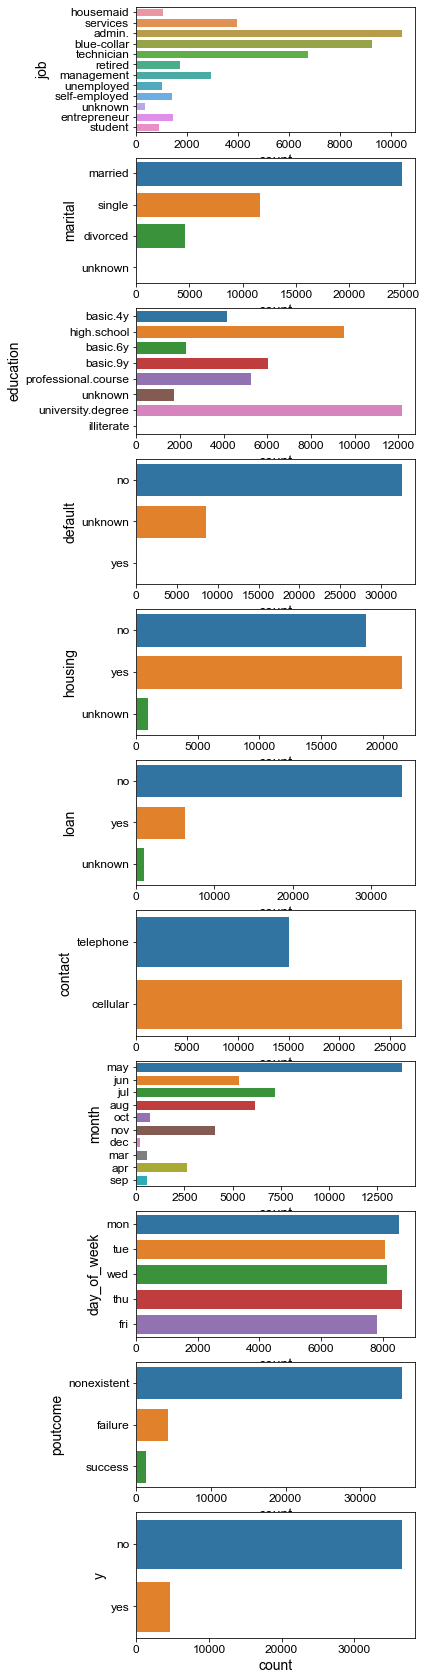

In [10]:
cat = ["job", "marital", "education", "default", "housing", 
       "loan", "contact", "month", "day_of_week","poutcome", "y" ]

fig, ax = plt.subplots(len(cat), 1, figsize=(5, 30))
for variable, subplot in zip(cat, ax.flatten()):
    sns.set_style("ticks")
    sns.countplot(y=bank_df[variable], ax=subplot, label='medium')
    for label in subplot.get_xticklabels():
        label.set_rotation(0)
        plt.rcParams["font.family"] = "arial"

* Loan, education, job, marital, default, housing have the 'unknown' category

## Data Preprocessing
##### A closer look at variables...missing value imputation

In [12]:
bank_df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [13]:
bank = bank_df.copy()
# Copy the dataset

bank["deposit"] = np.where(bank['y'] == "yes", 1, 0)
# Define Deposit variable

del bank['y']
# Drop Y

In [14]:
# Determine unknown value percent for the 6 columns with unknowns
job_unknown = len(bank[bank['job']=='unknown'])/len(bank) * 100
marital_unknown = len(bank[bank['marital']=='unknown'])/len(bank) * 100
loan_unknown = len(bank[bank['loan']=='unknown'])/len(bank) * 100
default_unknown = len(bank[bank['default']=='unknown'])/len(bank) * 100
education_unknown = len(bank[bank['education']=='unknown'])/len(bank) * 100
housing_unknown = len(bank[bank['housing']=='unknown'])/len(bank) * 100

print("The unknown values in job represent {}% of the dataset".format(round(job_unknown, 2)))
print("The unknown values in marital represent {}% of the dataset".format(round(marital_unknown, 2)))
print("The unknown values in loan represent {}% of the dataset".format(round(loan_unknown, 2)))
print("The unknown values in default represent {}% of the dataset".format(round(default_unknown, 2)))
print("The unknown values in education represent {}% of the dataset".format(round(education_unknown, 2)))
print("The unknown values in housing represent {}% of the dataset".format(round(housing_unknown, 2)))

The unknown values in job represent 0.8% of the dataset
The unknown values in marital represent 0.19% of the dataset
The unknown values in loan represent 2.4% of the dataset
The unknown values in default represent 20.87% of the dataset
The unknown values in education represent 4.2% of the dataset
The unknown values in housing represent 2.4% of the dataset


In [15]:
## JOB

bank['job'].replace('unknown', np.nan, inplace=True)
# Replace unknown with np.nan

imp = Imputer(missing_values=np.nan, strategy="most_frequent")
bank["job"] = imp.fit_transform(bank[["job"]]).ravel()
# Replacing 'unknown' in job with the mode

In [16]:
## MARITAL 

bank['marital'].replace('unknown', np.nan, inplace=True)
# Replace unknown with np.nan

bank["marital"] = imp.fit_transform(bank[["marital"]]).ravel()
# Replacing 'unknown' in marital with the mode

In [17]:
## LOAN

bank['loan'].replace('unknown', np.nan, inplace=True)
# Replace unknown with np.nan

bank["loan"] = imp.fit_transform(bank[["loan"]]).ravel()
# Replacing 'unknown' in loan with the mode - ~82% of the entries have a value of no which is mode.

In [18]:
## DEFAULT

bank['default'].replace('unknown', np.nan, inplace=True)
# Replace unknown with np.nan

bank["default"] = imp.fit_transform(bank[["default"]]).ravel()
# Replacing 'unknown' in loan with the mode - ~79% of the entries have a value of no which is mode.

In [19]:
## HOUSING - MODE

bank['housing'].replace('unknown', np.nan, inplace=True)
# Replace unknown with np.nan

bank["housing"] = imp.fit_transform(bank[["housing"]]).ravel()
# Replacing 'unknown' in housing with the mode

In [20]:
## EDUCATION - MODE

bank['education'].replace('unknown', np.nan, inplace=True)
# Replace unknown with np.nan

bank['age'] = bank['age'].astype(int)
# Change type

under20 = bank[bank['age'] < 20]
over20 = bank[bank['age'] >= 20]
# Split by age

over20.shape, under20.shape, bank.shape

over20["education"] = imp.fit_transform(over20[["education"]]).ravel()
under20["education"] = imp.fit_transform(under20[["education"]]).ravel()
# Impute by mode

frames = [over20, under20]
bank =  pd.concat(frames)
# Put them back together

<ipython-input-20-f44c42951ee1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over20["education"] = imp.fit_transform(over20[["education"]]).ravel()
<ipython-input-20-f44c42951ee1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under20["education"] = imp.fit_transform(under20[["education"]]).ravel()


In [21]:
bank.isna().sum()
# Confirm no NAs after some data preprocessing

0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

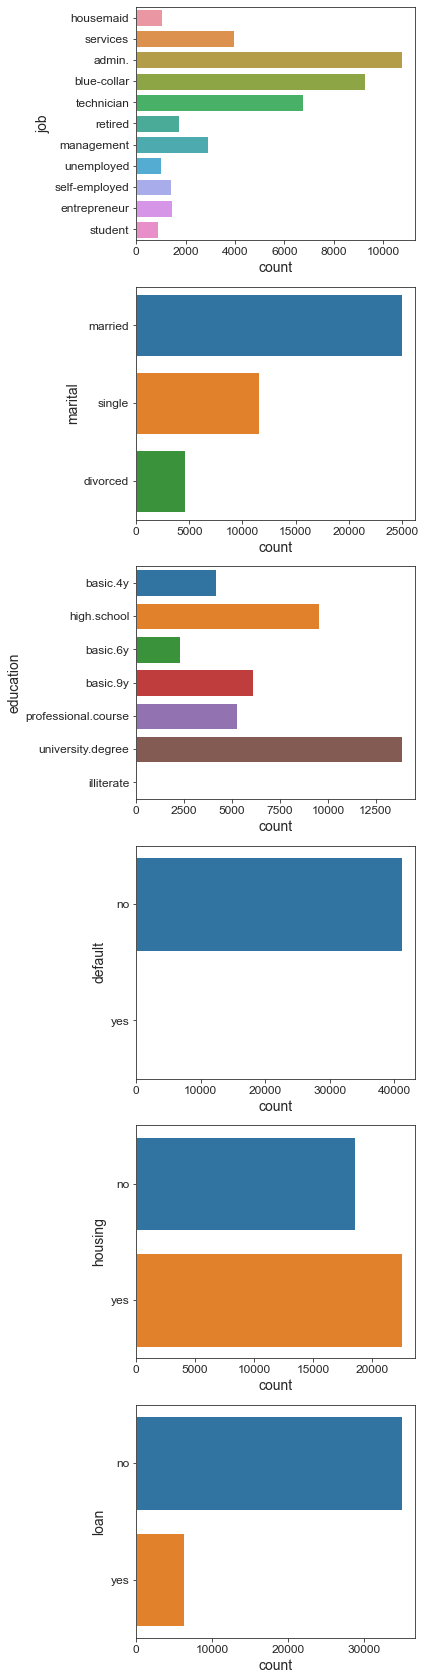

In [22]:
# LETS LOOK AT THE GRAPHS AGAIN 

cat = ["job", "marital", "education", "default", "housing", 
       "loan" ]

fig, ax = plt.subplots(len(cat), 1, figsize=(5, 30))
for variable, subplot in zip(cat, ax.flatten()):
    sns.set_style("ticks")
    sns.countplot(y=bank[variable], ax=subplot, label='medium')
    for label in subplot.get_xticklabels():
        label.set_rotation(0)
        plt.rcParams["font.family"] = "arial"

In [23]:
del bank['default']
# Dropping default because if a majority is no then it will not be useful for the model

#### Summary
* Imputed 'unknown' in variables using the mode
* Removed 'default' because it is only 'no' therefore it is not helpful.

Now check output variable (desired target) of our dataset.<br> 
Attribute 21 - y(Deposit) - has the client subscribed a term deposit? (binary: 'yes','no')

In [24]:
bank.deposit.value_counts()

0    36548
1     4640
Name: deposit, dtype: int64

In [25]:
# Calculate and plote distribution of subscribed term deposit
allcount=len(bank)
print(allcount)
yescount=bank[bank['deposit']==1].count()[0]
nocount=bank[bank['deposit']==0].count()[0]
print(yescount,nocount)
yperc=round(yescount/allcount*100,2)
nperc=round(nocount/allcount*100,2)
pcount=allcount-yescount
print(yperc,nperc,pcount)

41188
4640 36548
11.27 88.73 36548


Text(0.7, 3000, '11.27%')

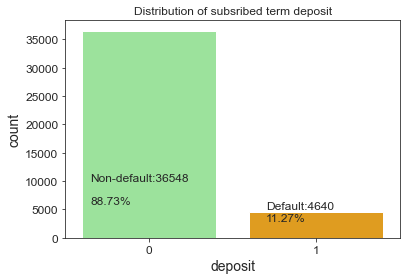

In [26]:
# Check the distribution on yes and no values using plot
plt.title("Distribution of subsribed term deposit")
sns.countplot(x='deposit',data=bank,palette=['lightgreen','orange']);
plt.annotate('Non-default:'+ str(pcount),xy=(-0.35,10000), xytext=(-0.35,10000), size=12)
plt.annotate(str(nperc)+'%',xy=(-0.35,6000), xytext=(-0.35,6000), size=12)
plt.annotate('Default:'+ str(yescount),xy=(0.7,5000), xytext=(0.7,5000), size=12)
plt.annotate(str(yperc)+'%',xy=(0.7,3000), xytext=(0.7,3000), size=12)

Based on observation our dataset is highly imbalanced and we will fix it by using resampling technique in the cells below 

#### Seperate variables by target, categorical and numerical

In [27]:
TARGET = "deposit"
columns_predictors = [col for col in bank.columns if col not in [TARGET]]
columns_categorical = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome']
columns_numerical = [col for col in columns_predictors if col not in columns_categorical]

print('Dependent variable: ' , TARGET) 
print('Categorical variables:', columns_categorical)
print('Numerical variables:', columns_numerical)

Dependent variable:  deposit
Categorical variables: ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numerical variables: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


Now review numerical variables of the dataset

In [28]:
bank[columns_numerical].dtypes

0
age                int64
duration          object
campaign          object
pdays             object
previous          object
emp.var.rate      object
cons.price.idx    object
cons.conf.idx     object
euribor3m         object
nr.employed       object
dtype: object

For better performance and more clean data let's convert numerical variables from object type to correspondent 
numerical type based on observed data

In [29]:
#Check min and max values for numerical variables
for i in columns_numerical: 
    min=bank[i].min()
    max=bank[i].max()
    print (i+': min='+ str(min) +' max=' +str(max))

age: min=17 max=98
duration: min=0 max=999
campaign: min=1 max=9
pdays: min=0 max=999
previous: min=0 max=7
emp.var.rate: min=-0.1 max=1.4
cons.price.idx: min=92.201 max=94.767
cons.conf.idx: min=-26.9 max=-50.8
euribor3m: min=0.634 max=5.045
nr.employed: min=4963.6 max=5228.1


In [30]:
# Make a copy of the current dataset
bankn=bank.copy()

# Define columns to transform to int or float types based on the values
intcolumns=['age','duration','campaign','pdays','previous']
floatcolumns=['emp.var.rate','cons.price.idx','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

In [31]:
# Convert object types to numerical values
bankn[intcolumns]=bankn[intcolumns].astype(dtype='int16')
bankn[floatcolumns]=bankn[floatcolumns].astype('float16')
bankn[columns_numerical].dtypes
# Numerical columns were transformed

0
age                 int16
duration            int16
campaign            int16
pdays               int16
previous            int16
emp.var.rate      float16
cons.price.idx    float16
cons.conf.idx     float16
euribor3m         float16
nr.employed       float16
dtype: object

In [32]:
bankn[columns_numerical]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
1,56,261,1,999,0,1.1,94.00,-36.41,4.86,5192.0
2,57,149,1,999,0,1.1,94.00,-36.41,4.86,5192.0
3,37,226,1,999,0,1.1,94.00,-36.41,4.86,5192.0
4,40,151,1,999,0,1.1,94.00,-36.41,4.86,5192.0
5,56,307,1,999,0,1.1,94.00,-36.41,4.86,5192.0
...,...,...,...,...,...,...,...,...,...,...
40745,19,161,2,6,4,-1.1,94.19,-37.50,0.88,4964.0
40760,19,452,5,13,1,-1.1,94.19,-37.50,0.88,4964.0
41085,18,600,2,999,3,-1.1,94.75,-50.81,1.05,4964.0
41089,18,394,1,13,2,-1.1,94.75,-50.81,1.05,4964.0


In [33]:
bankn

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
1,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,94.00,-36.41,4.86,5192.0,0
2,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,94.00,-36.41,4.86,5192.0,0
3,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,94.00,-36.41,4.86,5192.0,0
4,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,94.00,-36.41,4.86,5192.0,0
5,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,94.00,-36.41,4.86,5192.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40745,19,student,single,basic.6y,yes,no,cellular,sep,thu,161,2,6,4,success,-1.1,94.19,-37.50,0.88,4964.0,1
40760,19,student,single,basic.6y,yes,yes,cellular,sep,thu,452,5,13,1,success,-1.1,94.19,-37.50,0.88,4964.0,1
41085,18,student,single,basic.9y,yes,no,cellular,nov,tue,600,2,999,3,failure,-1.1,94.75,-50.81,1.05,4964.0,0
41089,18,student,single,basic.4y,yes,no,telephone,nov,tue,394,1,13,2,success,-1.1,94.75,-50.81,1.05,4964.0,1


Check feature importance of numerical data, build correlation matrix

In [34]:
# Add numeric and dependent variable to the dataframe 
corr_data=bankn[columns_numerical+['deposit']]
corr = corr_data.corr()
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,,,,,,,,,,,
age,1.00e+00,-8.66e-04,4.59e-03,-0.03,0.02,-3.80e-04,8.28e-04,1.29e-01,0.01,-0.02,0.03
duration,-8.66e-04,1.00e+00,-7.17e-02,-0.05,0.02,-2.80e-02,6.14e-03,-8.17e-03,-0.03,-0.04,0.41
campaign,4.59e-03,-7.17e-02,1.00e+00,0.05,-0.08,1.51e-01,1.28e-01,-1.37e-02,0.14,0.14,-0.07
pdays,-3.44e-02,-4.76e-02,5.26e-02,1.00,-0.59,2.71e-01,8.00e-02,-9.12e-02,0.30,0.37,-0.32
previous,2.44e-02,2.06e-02,-7.91e-02,-0.59,1.00,-4.20e-01,-2.06e-01,-5.10e-02,-0.45,-0.50,0.23
emp.var.rate,-3.80e-04,-2.80e-02,1.51e-01,0.27,-0.42,1.00e+00,7.81e-01,1.96e-01,0.97,0.91,-0.30
cons.price.idx,8.28e-04,6.14e-03,1.28e-01,0.08,-0.21,7.81e-01,1.00e+00,6.39e-02,0.69,0.53,-0.14
cons.conf.idx,1.29e-01,-8.17e-03,-1.37e-02,-0.09,-0.05,1.96e-01,6.39e-02,1.00e+00,0.28,0.10,0.05
euribor3m,1.08e-02,-3.29e-02,1.35e-01,0.30,-0.45,9.72e-01,6.94e-01,2.78e-01,1.00,0.95,-0.31


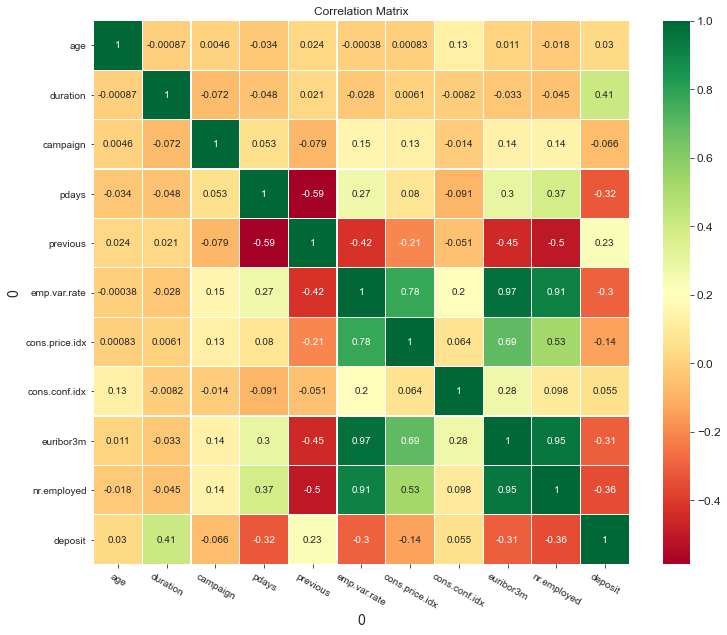

In [35]:
#Plot the Heat Matrix
plt.close()
cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

The lowest correlation is between <br> 
    - deposit and age, only 0.03, <br>
    - deposit and campaign, only 0.066 <br>
    - deposit and cons.conf.idx, only 0.055<br>
We can drop these there features from our dataset and check if results will be different or our chosen classifiers 
will not consider these features as well

In [36]:
bankf=bankn.drop(['age', 'campaign','cons.conf.idx'], axis=1, inplace=False)

In [37]:
bankf.head(5)

,job,marital,education,housing,loan,contact,month,day_of_week,duration,pdays,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed,deposit
1,housemaid,married,basic.4y,no,no,telephone,may,mon,261,999,0,nonexistent,1.1,94.0,4.86,5192.0,0
2,services,married,high.school,no,no,telephone,may,mon,149,999,0,nonexistent,1.1,94.0,4.86,5192.0,0
3,services,married,high.school,yes,no,telephone,may,mon,226,999,0,nonexistent,1.1,94.0,4.86,5192.0,0
4,admin.,married,basic.6y,no,no,telephone,may,mon,151,999,0,nonexistent,1.1,94.0,4.86,5192.0,0
5,services,married,high.school,no,yes,telephone,may,mon,307,999,0,nonexistent,1.1,94.0,4.86,5192.0,0


In [38]:
# From here I'll start to use prepared dataset bankf  
#columns_numerical = [col for col in columns_predictors if col not in columns_categorical]

columns_predictors_f = [col for col in bankf.columns if col not in [TARGET]]
columns_numerical_f = [col for col in columns_numerical if col not in ['cons.conf.idx', 'age', 'campaign']]
#list(np.array(columns_numerical) - np.array(['cons.conf.idx', 'age', 'campaign']))
print(columns_numerical_f)
print(columns_predictors_f)

['duration', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']
['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']


#### Scaling/Encode Variables Preprocessor

In [40]:
## Create the preprocessors for categorical and numerical

categorical_preprocessor  = Pipeline([('onehot', OneHotEncoder(handle_unknown="ignore")),])
numerical_preprocessor  = Pipeline([('scaler', StandardScaler()),])
# Build seperate categorical and numerical

preprocessor = ColumnTransformer([("categorical", categorical_preprocessor, columns_categorical),
                                   ("numerical", numerical_preprocessor, columns_numerical),])

# Categorical + Numerical = Pipeline

X = bank[columns_predictors]
y = bank[TARGET]
# Define X and y


#### Split into training/testing dataset

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123, stratify=y) #stratified sampling based on the target
# Split data into training (80%) and testing (20%)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
# Shape of the train/test splits

((32950, 19), (8238, 19), (32950,), (8238,))

In [42]:
X_prep_train = preprocessor.fit_transform(X_train)
# Apply fit_transform to training X

X_prep_test = preprocessor.transform(X_test)
# Apply transform to testing X

In [43]:
#X_prep_train

In [44]:
#X_prep_test

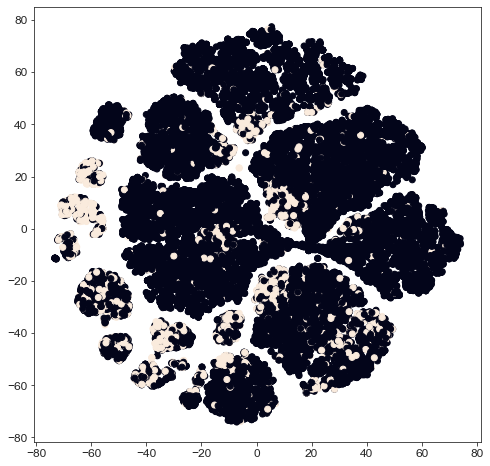

In [45]:
#Visualize the dataset
from sklearn.manifold import TSNE
model=TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data=model.fit_transform(X_prep_train)
plt.figure(figsize=(8,8))
#palette=sns.color_palette("hls", 10)
plt.scatter(tsne_data[:,0],tsne_data[:,1], c=y_train.values)
plt.show()


## Resampling

In [46]:
from sklearn.utils import resample
X_df_train = pd.DataFrame(X_prep_train)
y_df_train = pd.DataFrame(y_train)

In [47]:
X_df_train["deposit"] = y_df_train.reset_index()["deposit"]

In [48]:
count_majority, count_minority = X_df_train.deposit.value_counts()
print(count_majority)
print(count_minority)

29238
3712


In [49]:
# Majority and minority classes/datasets
dataset_majority = X_df_train[X_df_train.deposit == 0]
dataset_minority = X_df_train[X_df_train.deposit == 1]

# Downsample majority class
df_majority_downsampled = resample(dataset_majority, replace=False,n_samples=count_minority, random_state=123)

X_train_downsampled = pd.concat([df_majority_downsampled, dataset_minority])
X_train_downsampled.deposit.value_counts()

1    3712
0    3712
Name: deposit, dtype: int64

In [50]:
y_train_r = X_train_downsampled.deposit
X_train_r = X_train_downsampled.drop('deposit', axis=1)

In [51]:
y_train_r

12309    0
27540    0
140      0
21385    0
24425    0
        ..
32920    1
32921    1
32932    1
32939    1
32949    1
Name: deposit, Length: 7424, dtype: int64

In [52]:
X_train_r

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
12309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.14,-0.73,-0.57,0.19,-0.35,0.65,0.73,0.88,0.71,0.33
27540,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.53,-0.61,-0.20,0.19,-0.35,0.65,0.73,0.88,0.71,0.33
140,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.43,-0.64,-0.57,0.19,-0.35,0.84,0.60,-0.47,0.77,0.85
21385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.67,-0.18,1.25,0.19,-0.35,0.84,-0.22,0.95,0.78,0.85
24425,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.20,-0.94,2.33,0.19,-0.35,-1.20,-1.18,-1.23,-1.36,-0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.86,1.39,-0.20,0.19,-0.35,-1.20,-0.86,-1.42,-1.30,-0.94
32921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.20,-0.04,-0.57,-5.17,7.76,-1.20,-0.35,1.23,-1.72,-2.19
32932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.87,7.06,-0.20,0.19,-0.35,0.65,0.73,0.88,0.71,0.33
32939,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.34,-0.65,-0.20,-5.17,1.68,-1.90,-2.37,1.96,-1.60,-1.26


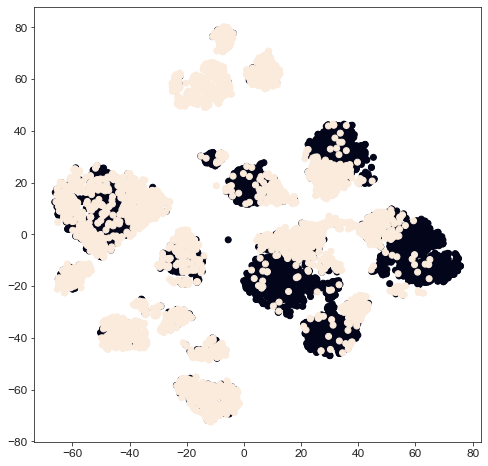

In [53]:
#Visualize the resampled dataset
from sklearn.manifold import TSNE
model=TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data=model.fit_transform(X_train_r)
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:,0],tsne_data[:,1], c=y_train_r.values)
plt.show()

In [54]:
X_train_r.shape, y_train_r.shape

((7424, 55), (7424,))

---

## Hyperparameter tuning various machine learning models using GridSearchCV

Let's create a class that helps us test various models.  

In [55]:
class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=True):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator' : key,
                 'min_score' : np.min(scores),
                 'max_score' : np.max(scores),
                 'mean_score': np.mean(scores),
                 'std_score' : np.std(scores)
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)

            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))


        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

Defining the **EstimatorSelectionHelper** along with the ***__init__ and fit methods***  helps us to run all the models at the same time with the choosen parameter list.  The **score_summary()** compares the scores from various models and lists them by the **mean roc_auc score** value.   

Let's choose the models and hyper-parameters.

In [56]:
models = {
    'RandomForestClassifier'    : RandomForestClassifier(),
    'DecisionTreeClassifier'    : DecisionTreeClassifier(),
    'kNNClassifier'             : KNeighborsClassifier(),
    'AdaBoostClassifier'        : AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
    'ExtraTreesClassifier'      : ExtraTreesClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

params = {
    'RandomForestClassifier'    : { 'n_estimators': [50, 100], 'max_depth': np.arange(3,10), 'min_samples_leaf': range(10,50,10)},
    'DecisionTreeClassifier'    : { 'max_depth': np.arange(3,10), 'min_samples_leaf': range(10,50,10)},
    'kNNClassifier'             : { 'n_neighbors': [5, 10],    'weights': ['uniform', 'distance']}, 
    'AdaBoostClassifier'        : { 'n_estimators': [50, 100], 'algorithm': ['SAMME', 'SAMME.R'], 'base_estimator__min_samples_leaf': range(10,50,10)},
    'ExtraTreesClassifier'      : { 'n_estimators': [50, 100], 'max_depth': np.arange(3,10), 'min_samples_leaf': range(10,50,10)},
    'GradientBoostingClassifier': { 'n_estimators': [50, 100], 'max_depth': np.arange(3,10), 'min_samples_leaf': range(10,50,10), 'learning_rate': [0.8, 1.0]}
}


### a.  Models based on down-sampled data

Let's run the models on the down-sampled training set first to check its performance.  

In [57]:
helper1 = EstimatorSelectionHelper(models, params)
helper1.fit(X_train_r, y_train_r, scoring='roc_auc', n_jobs=-1)

Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 56 candidates, totalling 168 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   25.5s finished


Running GridSearchCV for DecisionTreeClassifier.
Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running GridSearchCV for kNNClassifier.
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   15.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running GridSearchCV for AdaBoostClassifier.
Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   53.1s finished


Running GridSearchCV for ExtraTreesClassifier.
Fitting 3 folds for each of 56 candidates, totalling 168 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   24.0s finished


Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 112 candidates, totalling 336 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 336 out of 336 | elapsed:  3.8min finished


You can see each model's **accuracy (column, mean_score)** along with the parameters used.

In [58]:
pd.set_option('display.max_rows', helper1.score_summary(sort_by='mean_score').shape[0]+1)

In [59]:
#Display score summary for each estimator
display(helper1.score_summary(sort_by='mean_score'))

,estimator,min_score,mean_score,max_score,std_score,max_depth,min_samples_leaf,n_estimators,n_neighbors,weights,algorithm,base_estimator__min_samples_leaf,learning_rate
164,GradientBoostingClassifier,0.94,0.94,0.94,0.0018,3,30,50,NaN,NaN,NaN,NaN,0.8
166,GradientBoostingClassifier,0.94,0.94,0.94,0.0023,3,40,50,NaN,NaN,NaN,NaN,0.8
160,GradientBoostingClassifier,0.94,0.94,0.94,0.0029,3,10,50,NaN,NaN,NaN,NaN,0.8
162,GradientBoostingClassifier,0.94,0.94,0.94,0.0011,3,20,50,NaN,NaN,NaN,NaN,0.8
222,GradientBoostingClassifier,0.94,0.94,0.94,0.0011,3,40,50,NaN,NaN,NaN,NaN,1
161,GradientBoostingClassifier,0.94,0.94,0.94,0.0021,3,10,100,NaN,NaN,NaN,NaN,0.8
172,GradientBoostingClassifier,0.93,0.94,0.94,0.0023,4,30,50,NaN,NaN,NaN,NaN,0.8
167,GradientBoostingClassifier,0.94,0.94,0.94,0.0017,3,40,100,NaN,NaN,NaN,NaN,0.8
165,GradientBoostingClassifier,0.94,0.94,0.94,0.0027,3,30,100,NaN,NaN,NaN,NaN,0.8
163,GradientBoostingClassifier,0.93,0.94,0.94,0.002,3,20,100,NaN,NaN,NaN,NaN,0.8


#### Best Tuned Model : Gradient Boosting Model

As you see in the above table, **the best performing model was Gradient Boosting Classifier** ('max_depth': 3, 'n_estimators': 50, 'min_samples_leaf': 30, 'learning_rate': 0.8) with an accuracy of 94%.  

Let's see what the predicted accuracy is for Gradient Boosting model.

In [60]:
helper1.grid_searches['GradientBoostingClassifier'].best_score_

0.9406143970040741

In [61]:
helper1.grid_searches['GradientBoostingClassifier'].best_estimator_

GradientBoostingClassifier(learning_rate=0.8, min_samples_leaf=30,
                           n_estimators=50)

#### Predicted ROC_AUC score of all models

In [62]:
y_pred_gb = helper1.grid_searches['GradientBoostingClassifier'].predict(X_prep_test)
y_pred_proba_gb = helper1.grid_searches['GradientBoostingClassifier'].predict_proba(X_prep_test)
print(f"\033[1m GradientBoostingClassifier \t- ROC_AUC Score =\033[1;32m {np.round(roc_auc_score(y_test, y_pred_proba_gb[:,1]), 4)}\033[0m")   

y_pred_ab = helper1.grid_searches['AdaBoostClassifier'].predict(X_prep_test)
y_pred_proba_ab = helper1.grid_searches['AdaBoostClassifier'].predict_proba(X_prep_test)
print(f"\033[1m AdaBoostClassifier \t\t- ROC_AUC Score =\033[1;32m {np.round(roc_auc_score(y_test, y_pred_proba_ab[:,1]), 4)}\033[0m")   

y_pred_rf = helper1.grid_searches['RandomForestClassifier'].predict(X_prep_test)
y_pred_proba_rf = helper1.grid_searches['RandomForestClassifier'].predict_proba(X_prep_test)
print(f"\033[1m RandomForestClassifier \t- ROC_AUC Score =\033[1;32m {np.round(roc_auc_score(y_test, y_pred_proba_rf[:,1]), 4)}\033[0m")   

y_pred_dt = helper1.grid_searches['DecisionTreeClassifier'].predict(X_prep_test)
y_pred_proba_dt = helper1.grid_searches['DecisionTreeClassifier'].predict_proba(X_prep_test)
print(f"\033[1m DecisionTreeClassifier \t- ROC_AUC Score =\033[1;32m {np.round(roc_auc_score(y_test, y_pred_proba_dt[:,1]), 4)}\033[0m")   

y_pred_knn = helper1.grid_searches['kNNClassifier'].predict(X_prep_test)
y_pred_proba_knn = helper1.grid_searches['kNNClassifier'].predict_proba(X_prep_test)
print(f"\033[1m kNNClassifier \t\t\t- ROC_AUC Score =\033[1;32m {np.round(roc_auc_score(y_test, y_pred_proba_knn[:,1]), 4)}\033[0m")   

y_pred_et = helper1.grid_searches['ExtraTreesClassifier'].predict(X_prep_test)
y_pred_proba_et = helper1.grid_searches['ExtraTreesClassifier'].predict_proba(X_prep_test)
print(f"\033[1m ExtraTreesClassifier \t\t- ROC_AUC Score =\033[1;32m {np.round(roc_auc_score(y_test, y_pred_proba_et[:,1]), 4)}\033[0m")   

 GradientBoostingClassifier 	- ROC_AUC Score = 0.9403
 AdaBoostClassifier 		- ROC_AUC Score = 0.9363
 RandomForestClassifier 	- ROC_AUC Score = 0.9388
 DecisionTreeClassifier 	- ROC_AUC Score = 0.9371
 kNNClassifier 			- ROC_AUC Score = 0.9232
 ExtraTreesClassifier 		- ROC_AUC Score = 0.8925


#### Confusion Matrix

This section shows us the confusion matrix of each model.  

In [63]:
def display_confusion_matrix(model_name, y_test, y_pred, cmap, ):
    plt.title('\nConfusion Matrix - ' + model_name, fontweight="bold")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap=cmap, fmt=".0f",
                            xticklabels = ['No', 'Yes'], 
                            yticklabels = ['No', 'Yes'])

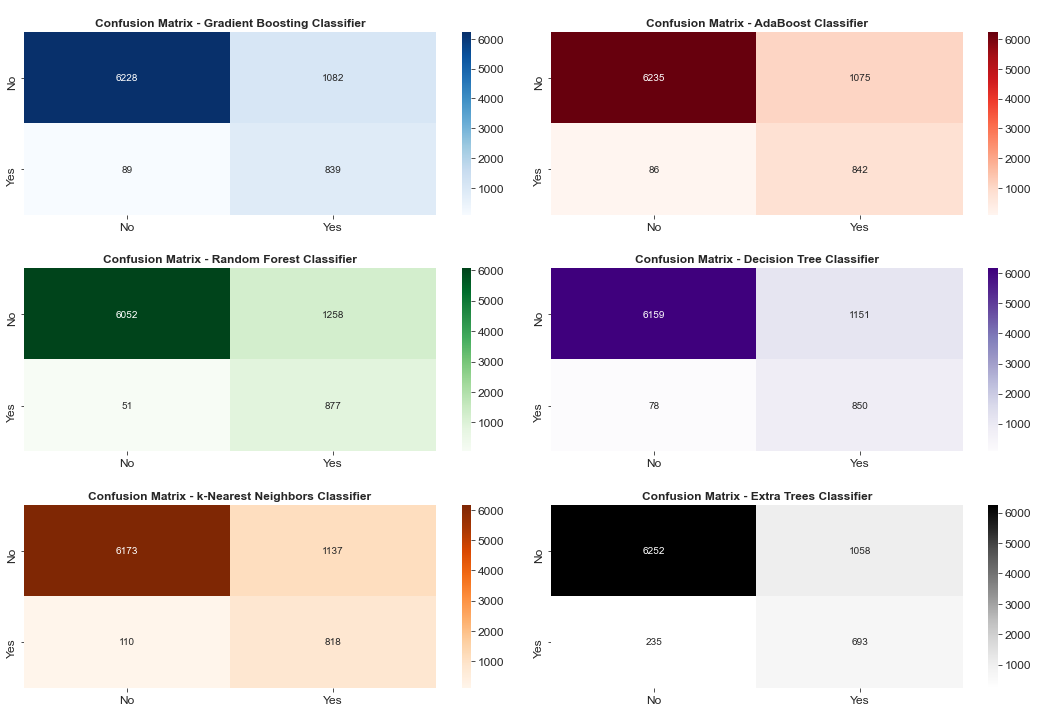

In [64]:
#Show confusion matrix
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
display_confusion_matrix('Gradient Boosting Classifier', y_test, y_pred_gb, plt.cm.Blues)

plt.subplot(3, 2, 2)
display_confusion_matrix('AdaBoost Classifier', y_test, y_pred_ab, plt.cm.Reds)

plt.subplot(3, 2, 3)
display_confusion_matrix('Random Forest Classifier', y_test, y_pred_rf, plt.cm.Greens)

plt.subplot(3, 2, 4)
display_confusion_matrix('Decision Tree Classifier', y_test, y_pred_dt, plt.cm.Purples)

plt.subplot(3, 2, 5)
display_confusion_matrix('k-Nearest Neighbors Classifier', y_test, y_pred_knn, plt.cm.Oranges)

plt.subplot(3, 2, 6)
display_confusion_matrix('Extra Trees Classifier', y_test, y_pred_et, plt.cm.Greys)

plt.tight_layout()
plt.show()

#### ROC_AUC Curve

We create a table, result_table_roc_auc to store the results of each classifier. 

In [65]:
#Define a result table to store roc_auc results as a DataFrame
result_table_roc_auc = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc','threshold','optimal_threshold','gmeans'])
#result_table_roc_auc

In [66]:
#Generate ROC-AUC graph data
def calculate_fpr_trp_thresholds(model_name, y_test,y_pred_proba,result_table_roc_auc):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
        
    # calculate the g-mean for each threshold
    gmeans = np.sqrt(tpr * (1-fpr))
    # locate the index of the largest g-mean
    optimal_idx = np.argmax(gmeans)
 

    #Append values to the dataframe
    result_table_roc_auc = result_table_roc_auc.append({'classifiers':model_name,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc,
                                        'threshold': thresholds,
                                        'optimal_threshold':thresholds[optimal_idx],
                                        'gmeans':gmeans[optimal_idx]}, ignore_index=True)     
    return result_table_roc_auc

In [67]:
#Create a function for plotting ROC-AUC curve
def plot_roc_auc_curve(result_table_roc_auc):
    fig = plt.figure(figsize=(12,7))
    
    for i in result_table_roc_auc.index:
        plt.plot(result_table_roc_auc.loc[i]['fpr'],
             result_table_roc_auc.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table_roc_auc.loc[i]['auc']))

    
    plt.plot([0,1], [0,1], color='green', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate (FPR)", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate (TPR)", fontsize=15)

    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')
    
    plt.legend(loc=4)
    plt.show()   

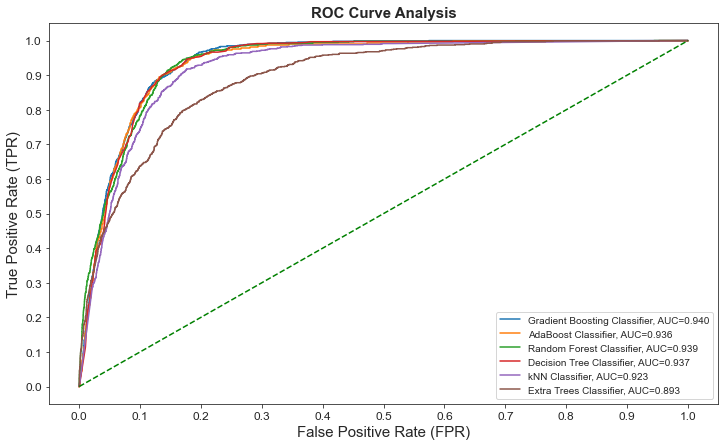

In [68]:
#call the function to calculate thresholds
result_table_roc_auc = calculate_fpr_trp_thresholds('Gradient Boosting Classifier',y_test, y_pred_proba_gb[:,1], result_table_roc_auc)
result_table_roc_auc = calculate_fpr_trp_thresholds('AdaBoost Classifier',y_test, y_pred_proba_ab[:,1], result_table_roc_auc)
result_table_roc_auc = calculate_fpr_trp_thresholds('Random Forest Classifier',y_test, y_pred_proba_rf[:,1], result_table_roc_auc)
result_table_roc_auc = calculate_fpr_trp_thresholds('Decision Tree Classifier',y_test, y_pred_proba_dt[:,1], result_table_roc_auc)
result_table_roc_auc = calculate_fpr_trp_thresholds('kNN Classifier',y_test, y_pred_proba_knn[:,1], result_table_roc_auc)
result_table_roc_auc = calculate_fpr_trp_thresholds('Extra Trees Classifier',y_test, y_pred_proba_et[:,1], result_table_roc_auc)

#Set name of the classifiers as index labels for the result table
result_table_roc_auc.set_index('classifiers', inplace=True)

#Plot the ROC_AUC curve
plot_roc_auc_curve(result_table_roc_auc)

---

### b.  Models based on original pre-processed data

Let's run the models on the original pre-processed training set to check its performance.  

In [73]:
X_prep_train.shape, y_train.shape

((32950, 55), (32950,))

In [74]:
helper2 = EstimatorSelectionHelper(models, params)
helper2.fit(X_prep_train, y_train, scoring='roc_auc', n_jobs=-1)

Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 56 candidates, totalling 168 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:  2.0min finished


Running GridSearchCV for DecisionTreeClassifier.
Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    6.6s finished


Running GridSearchCV for kNNClassifier.
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  3.8min finished


Running GridSearchCV for AdaBoostClassifier.
Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  9.6min finished


Running GridSearchCV for ExtraTreesClassifier.
Fitting 3 folds for each of 56 candidates, totalling 168 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:  2.3min finished


Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 112 candidates, totalling 336 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 336 out of 336 | elapsed: 30.0min finished


You can see each model's **accuracy (column, mean_score)** along with the parameters used.

In [75]:
pd.set_option('display.max_rows', helper2.score_summary(sort_by='mean_score').shape[0]+1)

In [76]:
#Display score summary for each estimator
display(helper2.score_summary(sort_by='mean_score'))

,estimator,min_score,mean_score,max_score,std_score,max_depth,min_samples_leaf,n_estimators,n_neighbors,weights,algorithm,base_estimator__min_samples_leaf,learning_rate
160,GradientBoostingClassifier,0.94,0.94,0.94,0.001,3,10,50,NaN,NaN,NaN,NaN,0.8
164,GradientBoostingClassifier,0.93,0.94,0.94,0.0044,3,30,50,NaN,NaN,NaN,NaN,0.8
161,GradientBoostingClassifier,0.94,0.94,0.94,0.0022,3,10,100,NaN,NaN,NaN,NaN,0.8
172,GradientBoostingClassifier,0.94,0.94,0.94,0.0026,4,30,50,NaN,NaN,NaN,NaN,0.8
174,GradientBoostingClassifier,0.94,0.94,0.94,0.0014,4,40,50,NaN,NaN,NaN,NaN,0.8
165,GradientBoostingClassifier,0.93,0.94,0.94,0.0034,3,30,100,NaN,NaN,NaN,NaN,0.8
162,GradientBoostingClassifier,0.93,0.94,0.94,0.0069,3,20,50,NaN,NaN,NaN,NaN,0.8
167,GradientBoostingClassifier,0.93,0.94,0.94,0.0043,3,40,100,NaN,NaN,NaN,NaN,0.8
175,GradientBoostingClassifier,0.94,0.94,0.94,4.5e-05,4,40,100,NaN,NaN,NaN,NaN,0.8
166,GradientBoostingClassifier,0.93,0.94,0.94,0.0037,3,40,50,NaN,NaN,NaN,NaN,0.8


#### Best Tuned Model

As you see in the above table, just like the down-sampled training set, **the best performing model was Gradient Boosting Classifier** ('max_depth': 3, 'n_estimators': 50, 'min_samples_leaf': 10, 'learning_rate': 0.8) with an accuracy of 94%.  

Let's see what the predicted accuracy is for this Gradient Boosting model.

In [77]:
helper2.grid_searches['GradientBoostingClassifier'].best_score_

0.942773970932287

In [78]:
helper2.grid_searches['GradientBoostingClassifier'].best_estimator_

GradientBoostingClassifier(learning_rate=0.8, min_samples_leaf=10,
                           n_estimators=50)

#### Predicted ROC_AUC score of all models

In [79]:
y_pred_gb = helper2.grid_searches['GradientBoostingClassifier'].predict(X_prep_test)
y_pred_proba_gb = helper2.grid_searches['GradientBoostingClassifier'].predict_proba(X_prep_test)
print(f"\033[1m GradientBoostingClassifier \t- ROC_AUC Score =\033[1;32m {np.round(roc_auc_score(y_test, y_pred_proba_gb[:,1]), 4)}\033[0m")   

y_pred_ab = helper2.grid_searches['AdaBoostClassifier'].predict(X_prep_test)
y_pred_proba_ab = helper2.grid_searches['AdaBoostClassifier'].predict_proba(X_prep_test)
print(f"\033[1m AdaBoostClassifier \t\t- ROC_AUC Score =\033[1;32m {np.round(roc_auc_score(y_test, y_pred_proba_ab[:,1]), 4)}\033[0m")   

y_pred_rf = helper2.grid_searches['RandomForestClassifier'].predict(X_prep_test)
y_pred_proba_rf = helper2.grid_searches['RandomForestClassifier'].predict_proba(X_prep_test)
print(f"\033[1m RandomForestClassifier \t- ROC_AUC Score =\033[1;32m {np.round(roc_auc_score(y_test, y_pred_proba_rf[:,1]), 4)}\033[0m")   

y_pred_dt = helper2.grid_searches['DecisionTreeClassifier'].predict(X_prep_test)
y_pred_proba_dt = helper2.grid_searches['DecisionTreeClassifier'].predict_proba(X_prep_test)
print(f"\033[1m DecisionTreeClassifier \t- ROC_AUC Score =\033[1;32m {np.round(roc_auc_score(y_test, y_pred_proba_dt[:,1]), 4)}\033[0m")   

y_pred_knn = helper2.grid_searches['kNNClassifier'].predict(X_prep_test)
y_pred_proba_knn = helper2.grid_searches['kNNClassifier'].predict_proba(X_prep_test)
print(f"\033[1m kNNClassifier \t\t\t- ROC_AUC Score =\033[1;32m {np.round(roc_auc_score(y_test, y_pred_proba_knn[:,1]), 4)}\033[0m")   

y_pred_et = helper2.grid_searches['ExtraTreesClassifier'].predict(X_prep_test)
y_pred_proba_et = helper2.grid_searches['ExtraTreesClassifier'].predict_proba(X_prep_test)
print(f"\033[1m ExtraTreesClassifier \t\t- ROC_AUC Score =\033[1;32m {np.round(roc_auc_score(y_test, y_pred_proba_et[:,1]), 4)}\033[0m")   

 GradientBoostingClassifier 	- ROC_AUC Score = 0.9455
 AdaBoostClassifier 		- ROC_AUC Score = 0.9401
 RandomForestClassifier 	- ROC_AUC Score = 0.94
 DecisionTreeClassifier 	- ROC_AUC Score = 0.9382
 kNNClassifier 			- ROC_AUC Score = 0.9062
 ExtraTreesClassifier 		- ROC_AUC Score = 0.91


#### Confusion Matrix

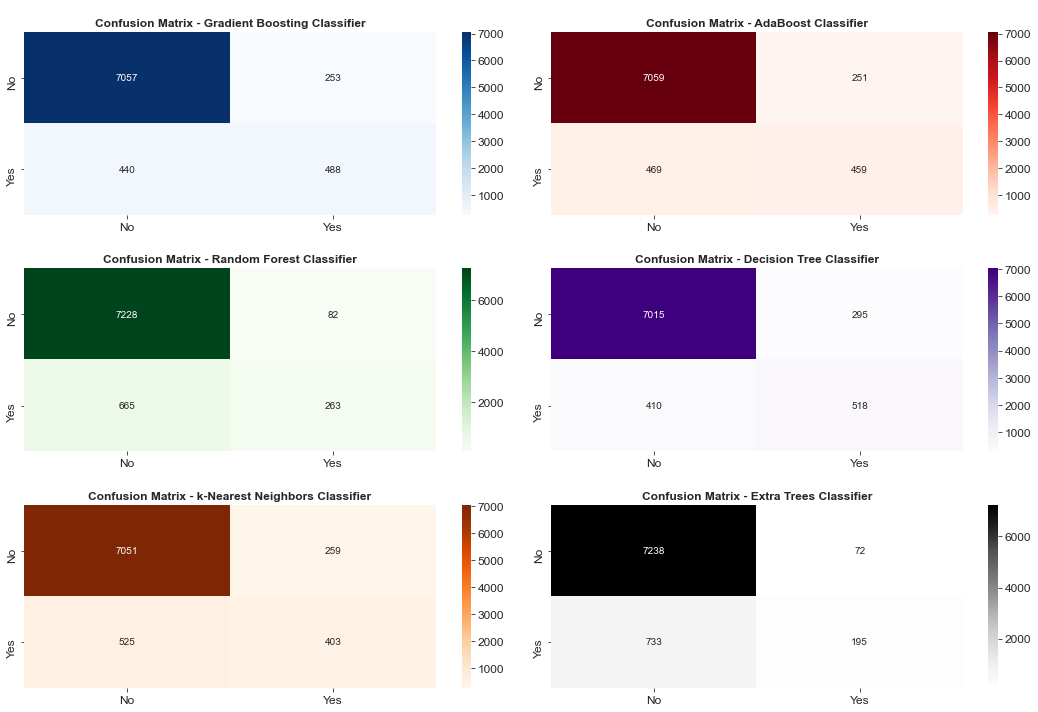

In [80]:
#Show confusion matrix
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
display_confusion_matrix('Gradient Boosting Classifier', y_test, y_pred_gb, plt.cm.Blues)

plt.subplot(3, 2, 2)
display_confusion_matrix('AdaBoost Classifier', y_test, y_pred_ab, plt.cm.Reds)

plt.subplot(3, 2, 3)
display_confusion_matrix('Random Forest Classifier', y_test, y_pred_rf, plt.cm.Greens)

plt.subplot(3, 2, 4)
display_confusion_matrix('Decision Tree Classifier', y_test, y_pred_dt, plt.cm.Purples)

plt.subplot(3, 2, 5)
display_confusion_matrix('k-Nearest Neighbors Classifier', y_test, y_pred_knn, plt.cm.Oranges)

plt.subplot(3, 2, 6)
display_confusion_matrix('Extra Trees Classifier', y_test, y_pred_et, plt.cm.Greys)

plt.tight_layout()
plt.show()

#### ROC_AUC Curve

In [81]:
#Define a result table to store roc_auc results as a DataFrame
result_table_roc_auc = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc','threshold','optimal_threshold','gmeans'])
#result_table_roc_auc

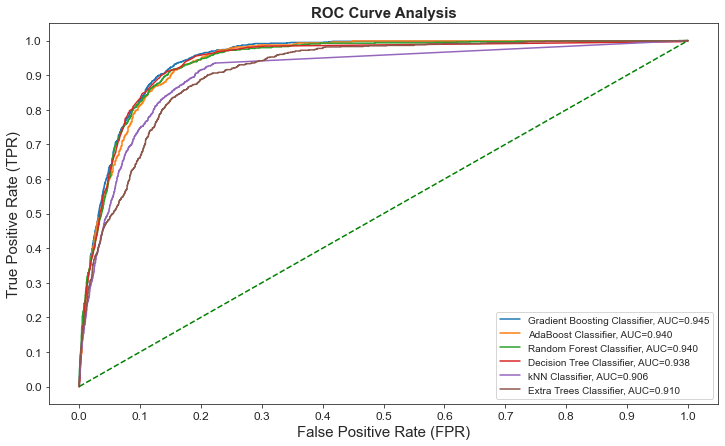

In [82]:
#call the function to calculate thresholds
result_table_roc_auc = calculate_fpr_trp_thresholds('Gradient Boosting Classifier',y_test, y_pred_proba_gb[:,1], result_table_roc_auc)
result_table_roc_auc = calculate_fpr_trp_thresholds('AdaBoost Classifier',y_test, y_pred_proba_ab[:,1], result_table_roc_auc)
result_table_roc_auc = calculate_fpr_trp_thresholds('Random Forest Classifier',y_test, y_pred_proba_rf[:,1], result_table_roc_auc)
result_table_roc_auc = calculate_fpr_trp_thresholds('Decision Tree Classifier',y_test, y_pred_proba_dt[:,1], result_table_roc_auc)
result_table_roc_auc = calculate_fpr_trp_thresholds('kNN Classifier',y_test, y_pred_proba_knn[:,1], result_table_roc_auc)
result_table_roc_auc = calculate_fpr_trp_thresholds('Extra Trees Classifier',y_test, y_pred_proba_et[:,1], result_table_roc_auc)

#Set name of the classifiers as index labels for the result table
result_table_roc_auc.set_index('classifiers', inplace=True)

#Plot the ROC_AUC curve
plot_roc_auc_curve(result_table_roc_auc)

When we compare results from the down-sampled and original pre-processed training set, we can see that roc_auc score is almost the same.  Both training sets give a **score of 94% for the best tuned model which is Gradient Boosting Classifier**.  

---